In [176]:
import requests
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is

True

In [ ]:
def clean_START_END(text):
    start_match = re.search(r'\*\*\* *START.*?\n', text, re.IGNORECASE)
    end_match = re.search(r'\*\*\* *END.*?\n', text, re.IGNORECASE)

    if start_match and end_match:
        start_idx = start_match.end()  
        end_idx = end_match.start() 
        cleantext = text[start_idx:end_idx]
    else:
        print("⚠️ START or END markers not found. Using full text.")
        cleantext = text

    return cleantext

In [66]:
def load_texts(urls):

    corpus = []
    
    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for HTTP issues
            text = response.text

            text = clean_START_END(text)
            
            # Clean non-word characters (keep letters, digits, and spaces)
            cleaned_text = re.sub(r"[^\w\s]", " ", text)
            cleaned_text = re.sub(r"\s+", " ", cleaned_text)  # Normalize whitespace
            cleaned_text = cleaned_text.strip()
            
            corpus.append(cleaned_text)
        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch {url}: {e}")
    
    return corpus


In [67]:
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",   # Alice in Wonderland
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",   # Through the Looking-Glass
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"  # A Tangled Tale
]

corpus = load_texts(urls)

In [68]:
def print_200(corpus):
    for i, text in enumerate(corpus, 0):
        print(corpus[i][:200])


In [69]:
print_200(corpus)

Illustration Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3 0 Contents CHAPTER I Down the Rabbit Hole CHAPTER II The Pool of Tears CHAPTER III A Caucus Race and a L
Illustration THROUGH THE LOOKING GLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition 1 7 DRAMATIS PERSONÆ _As arranged before commencement of game _ WHITE RED PIECES PAWNS
Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at https www pgdp net Music transcribed by Linda Cantoni Transcriber s note Minor punctuation errors have 


In [70]:
def tokenize(text):

    tokens = word_tokenize(text)

    words = [token.lower() for token in tokens if token.isalpha()]
    
    return words

def tokenize_corpus(corpus):
    token_corpus = []
    for i, text in enumerate(corpus):
        tokens = tokenize(text)
        token_corpus.append(tokens)

    return token_corpus

In [ ]:
corpus_tokens = tokenize_corpus(corpus)

#150 ou 200 c'est pareil
print_200(corpus_tokens)

['illustration', 'alice', 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucus', 'race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'tea', 'party', 'chapter', 'viii', 'the', 'queen', 's', 'croquet', 'ground', 'chapter', 'ix', 'the', 'mock', 'turtle', 's', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alice', 's', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'onc

In [75]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [76]:
# Remove stopword

corpus_no_stop_word = [remove_stopwords(tokens) for tokens in corpus_tokens]

print_200(corpus_no_stop_word)

['illustration', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucus', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'party', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix', 'mock', 'turtle', 'story', 'chapter', 'x', 'lobster', 'quadrille', 'chapter', 'xi', 'stole', 'tarts', 'chapter', 'xii', 'alice', 'evidence', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'dai

In [79]:
def count_word(tokens, word):
    return tokens.count(word)

# Before removal
print("Before stopword removal:")
print(f"'i': {count_word(corpus_tokens[2], 'i')}")
print(f"'me': {count_word(corpus_tokens[2], 'me')}")

# After removal
print("\nAfter stopword removal:")
print(f"'i': {count_word(corpus_no_stop_word[2], 'i')}")
print(f"'me': {count_word(corpus_no_stop_word[2], 'me')}")

Before stopword removal:
'i': 369
'me': 49

After stopword removal:
'i': 0
'me': 0


In [ ]:
stemmer = PorterStemmer()

def stemmed(tokens):
    return[stemmer.stem(word) for word in tokens]


In [83]:
corpus_stemmed = [stemmed(tokens) for tokens in corpus_no_stop_word]

print_200(corpus_stemmed)

['illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucu', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'parti', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix', 'mock', 'turtl', 'stori', 'chapter', 'x', 'lobster', 'quadril', 'chapter', 'xi', 'stole', 'tart', 'chapter', 'xii', 'alic', 'evid', 'chapter', 'rabbit', 'hole', 'alic', 'begin', 'get', 'tire', 'sit', 'sister', 'bank', 'noth', 'twice', 'peep', 'book', 'sister', 'read', 'pictur', 'convers', 'use', 'book', 'thought', 'alic', 'without', 'pictur', 'convers', 'consid', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepi', 'stupid', 'whether', 'pleasur', 'make', 'daisi', 'chain', 'would', 'worth', 'troubl', 'get', 'pick', 'daisi', 'sudd

In [87]:
nlp = spacy.load("en_core_web_sm")

In [151]:
def lemmatize_tokens(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token.lemma_) > 1 ] #Ajout des stop word

In [152]:
corpus_lemmatize = [lemmatize_tokens(tokens) for tokens in corpus]

In [153]:
print_200(corpus_lemmatize)

['Illustration', 'Alice', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'chapter', 'Rabbit', 'Hole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'Caucus', 'Race', 'Long', 'Tale', 'chapter', 'IV', 'Rabbit', 'send', 'Little', 'Bill', 'chapter', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'Tea', 'Party', 'CHAPTER', 'VIII', 'Queen', 'Croquet', 'Ground', 'chapter', 'IX', 'Mock', 'Turtle', 'Story', 'CHAPTER', 'Lobster', 'Quadrille', 'chapter', 'XI', 'steal', 'Tarts', 'CHAPTER', 'XII', 'Alice', 'evidence', 'chapter', 'Rabbit', 'Hole', 'Alice', 'begin', 'tired', 'sit', 'sister', 'bank', 'have', 'twice', 'peep', 'book', 'sister', 'read', 'picture', 'conversation', 'use', 'book', 'think', 'Alice', 'picture', 'conversation', 'consider', 'mind', 'hot', 'day', 'feel', 'sleepy', 'stupid', 'pleasure', 'make', 'daisy', 'chain', 'worth', 'trouble', 'get', 'pick', 'daisy', 'suddenly', 'White', 'Rabbit', 'pin

LEMMATIZE: On prend la forme canonique (de base) du mot.
STEMME : On raccourcit le mot quitte à le couper (peu ne pas avoir de sens)

In [ ]:
def pos_tag_text(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    return tagged

def pos_tag_corpus(corpus):
    tag_corpus = []
    for i, text in enumerate(corpus):
        tokens = pos_tag_text(text)
        tag_corpus.append(tokens)

    return tag_corpus

In [ ]:
pos_tag_corpus = pos_tag_corpus(corpus)

print_200(pos_tag_corpus)

[('Illustration', 'NNP'), ('Alice', 'NNP'), ('s', 'NN'), ('Adventures', 'NNP'), ('in', 'IN'), ('Wonderland', 'NNP'), ('by', 'IN'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('THE', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('3', 'CD'), ('0', 'CD'), ('Contents', 'NNPS'), ('CHAPTER', 'NN'), ('I', 'PRP'), ('Down', 'RP'), ('the', 'DT'), ('Rabbit', 'NNP'), ('Hole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('The', 'DT'), ('Pool', 'NNP'), ('of', 'IN'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('A', 'NNP'), ('Caucus', 'NNP'), ('Race', 'NNP'), ('and', 'CC'), ('a', 'DT'), ('Long', 'JJ'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('The', 'DT'), ('Rabbit', 'NNP'), ('Sends', 'NNPS'), ('in', 'IN'), ('a', 'DT'), ('Little', 'JJ'), ('Bill', 'NNP'), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('from', 'IN'), ('a', 'DT'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP'), ('and', 'CC'), ('Pepper', 'NNP'), ('CHAPTER', 'NNP'

In [127]:
def entities(corpus):
    named_entities = set() # utiliser un set pour éviter les doublons

    for i, text in enumerate(corpus):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        chunked = ne_chunk(tagged)

    for subtree in chunked:
        if isinstance(subtree, Tree):  # Si c’est une entité nommée
            entity_name = " ".join([token for token, pos in subtree.leaves()])
            entity_type = subtree.label()
            named_entities.add((entity_name, entity_type))

    return named_entities

In [128]:
entities(corpus)

{('AB', 'ORGANIZATION'),
 ('AC', 'ORGANIZATION'),
 ('ADDLEPATE', 'ORGANIZATION'),
 ('ADELAIDE', 'ORGANIZATION'),
 ('ADELINE', 'ORGANIZATION'),
 ('AGNES', 'ORGANIZATION'),
 ('AIX', 'ORGANIZATION'),
 ('ALGERNON', 'ORGANIZATION'),
 ('ALPHABETICAL', 'ORGANIZATION'),
 ('ALUMNUS', 'ORGANIZATION'),
 ('AMERICAN', 'ORGANIZATION'),
 ('AN', 'ORGANIZATION'),
 ('AND', 'ORGANIZATION'),
 ('ANITA', 'ORGANIZATION'),
 ('ANSWERS', 'ORGANIZATION'),
 ('ANSWERS TO', 'ORGANIZATION'),
 ('ANTONIE', 'ORGANIZATION'),
 ('ARDMORE', 'ORGANIZATION'),
 ('ARTHUR', 'ORGANIZATION'),
 ('ARVON', 'ORGANIZATION'),
 ('AYR', 'ORGANIZATION'),
 ('Achilles', 'GPE'),
 ('Achilles', 'PERSON'),
 ('Addish Subtrac Multiplica', 'PERSON'),
 ('Aftur Kyng Aruirag', 'PERSON'),
 ('Age', 'GPE'),
 ('Ah', 'PERSON'),
 ('Aix', 'PERSON'),
 ('Algebraical', 'ORGANIZATION'),
 ('Alice', 'ORGANIZATION'),
 ('Alice Oh', 'PERSON'),
 ('Always', 'PERSON'),
 ('America', 'GPE'),
 ('Apollo', 'PERSON'),
 ('Are', 'ORGANIZATION'),
 ('Aren', 'PERSON'),
 ('Arithme

In [140]:
def display_wordclouds(corpus_tokens):
    for i, tokens in enumerate(corpus_tokens):
        text = " ".join(tokens)
        wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')

        plt.show()

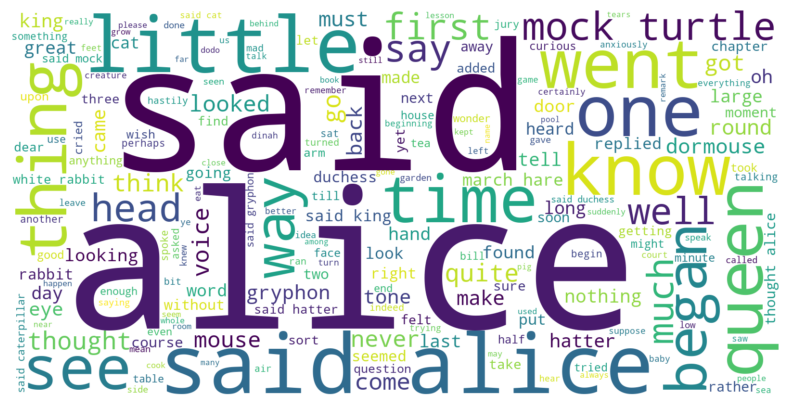

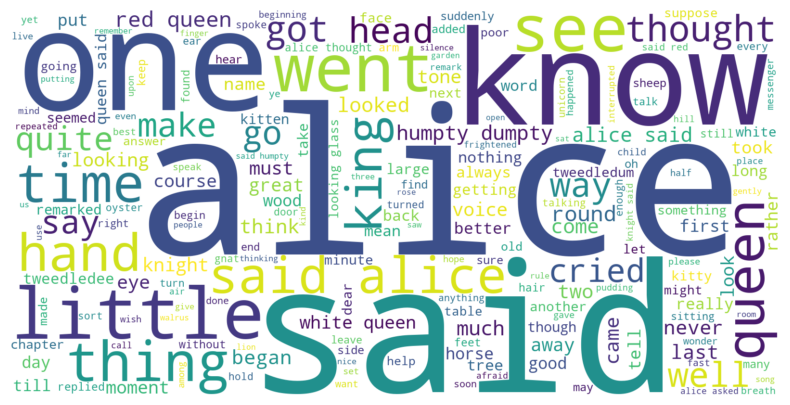

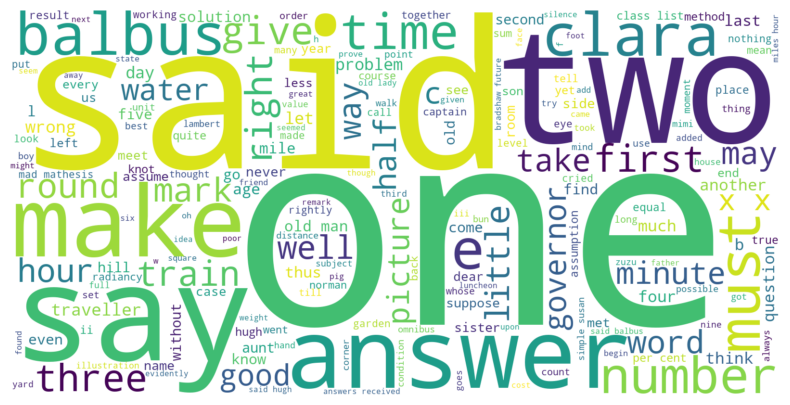

In [141]:
display_wordclouds(corpus_no_stop_word)

In [166]:
def most_common_words(lemmatized_corpus, n=5):
    all_tokens = []
    for tokens in lemmatized_corpus:
        all_tokens.extend(tokens)

    counter = Counter(all_tokens)
    most_common = counter.most_common(n)

    print(f"🔝 {n} mots les plus fréquents :")
    for word, freq in most_common:
        print(f"{word}: {freq}")

    labels, values = zip(*most_common)

# 🎯 Tracer le camembert
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct=lambda pct: format_label(pct, values), startangle=140)
    plt.title(f"Top {n} mots les plus fréquents")
    plt.axis("equal")  # Pour un cercle parfait
    plt.show()

def format_label(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return val

J'ai utiliser le lematize car on veut les mots dans leur version de base, et non par exemple say, said ....

🔝 5 mots les plus fréquents :
say: 1157
Alice: 867
think: 305
go: 302
little: 291


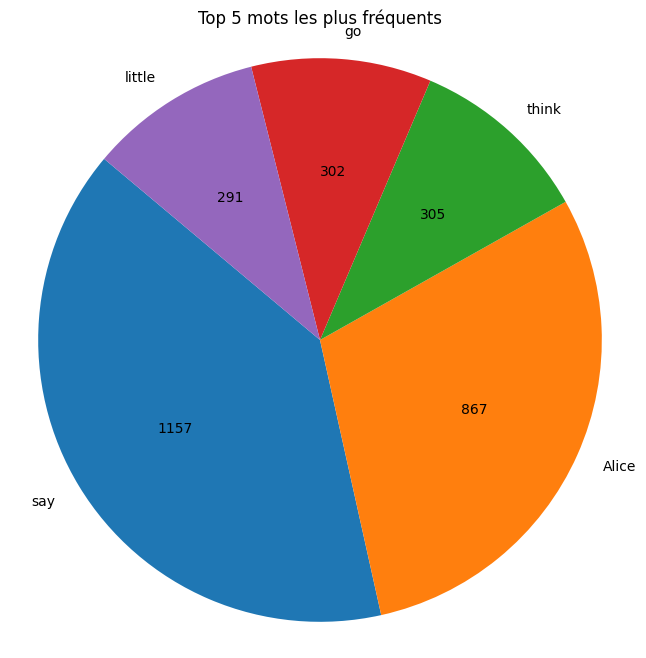

In [167]:
most_common_words(corpus_lemmatize, 5)

In [171]:
#par livre 
def most_common_words_by_book(lemmatized_corpus, n=5):
    
    for tokens in lemmatized_corpus:
        all_tokens = []
        all_tokens.extend(tokens)

        counter = Counter(all_tokens)
        most_common = counter.most_common(n)

        print(f"🔝 {n} mots les plus fréquents :")
        for word, freq in most_common:
            print(f"{word}: {freq}")

        labels, values = zip(*most_common)

    # 🎯 Tracer le camembert
        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct=lambda pct: format_label(pct, values), startangle=140)
        plt.title(f"Top {n} mots les plus fréquents")
        plt.axis("equal")  # Pour un cercle parfait
        plt.show()

def format_label(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))
    return val

🔝 5 mots les plus fréquents :
say: 479
Alice: 399
go: 130
think: 128
little: 128


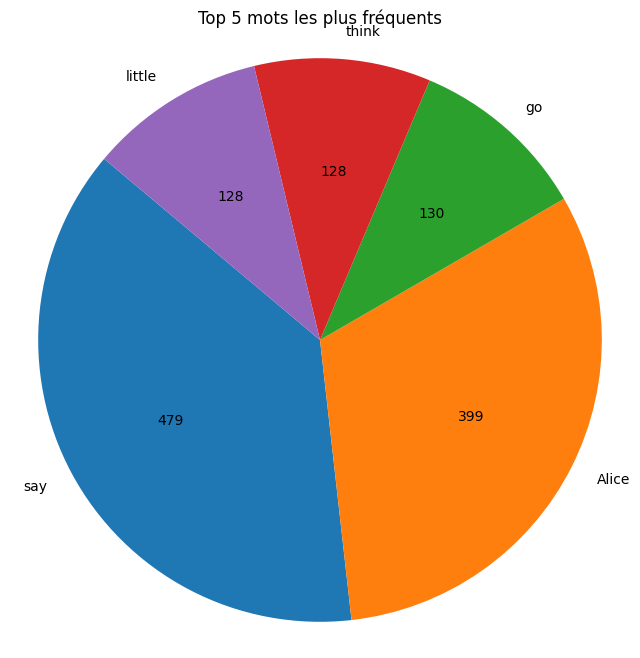

🔝 5 mots les plus fréquents :
say: 490
Alice: 466
Queen: 160
look: 147
know: 138


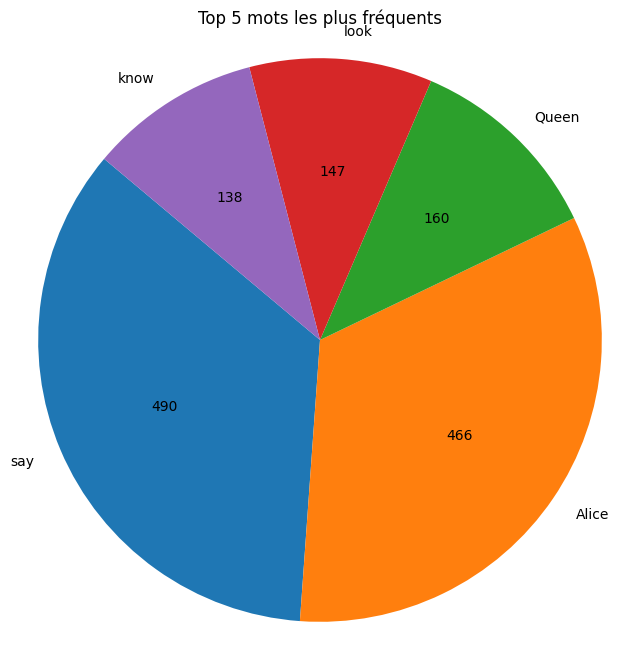

🔝 5 mots les plus fréquents :
say: 188
answer: 102
old: 77
Clara: 63
mark: 62


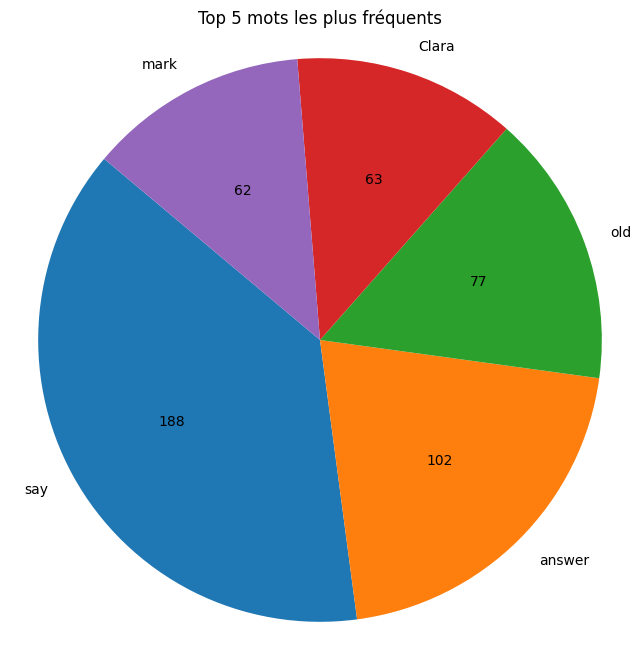

In [ ]:
most_common_words_by_book(corpus_lemmatize, 5)

In [174]:

# On convertit la liste de tokens en texte
corpus_lemmatize_joined = [' '.join(doc) for doc in corpus_lemmatize]

# Créer le vectorizer avec min_df et max_df adaptés au petit corpus
vectorizer = TfidfVectorizer(min_df=1, max_df=2)

# Appliquer TF-IDF sur le corpus en texte
tfidf_matrix = vectorizer.fit_transform(corpus_lemmatize_joined)

# Récupérer les mots (features)
feature_names = vectorizer.get_feature_names_out()

print("Shape de la matrice TF-IDF :", tfidf_matrix.shape)

Shape de la matrice TF-IDF : (3, 3797)


In [178]:
def print_top_tfidf_words(matrix, feature_names, top_n=5):
    for i in range(matrix.shape[0]):
        print(f"\n📘 Livre {i+1}")
        row = matrix[i].toarray().flatten()
        top_indices = row.argsort()[::-1][:top_n]
        for idx in top_indices:
            print(f"{feature_names[idx]}: {row[idx]:.4f}")

print_top_tfidf_words(tfidf_matrix, feature_names)


📘 Livre 1
gryphon: 0.3322
rabbit: 0.3262
turtle: 0.2848
hatter: 0.2619
mock: 0.2619

📘 Livre 2
dumpty: 0.3549
humpty: 0.3549
knight: 0.2843
tweedledum: 0.2345
tweedledee: 0.1838

📘 Livre 3
balbus: 0.3258
clara: 0.2890
problem: 0.2065
train: 0.1849
solution: 0.1743


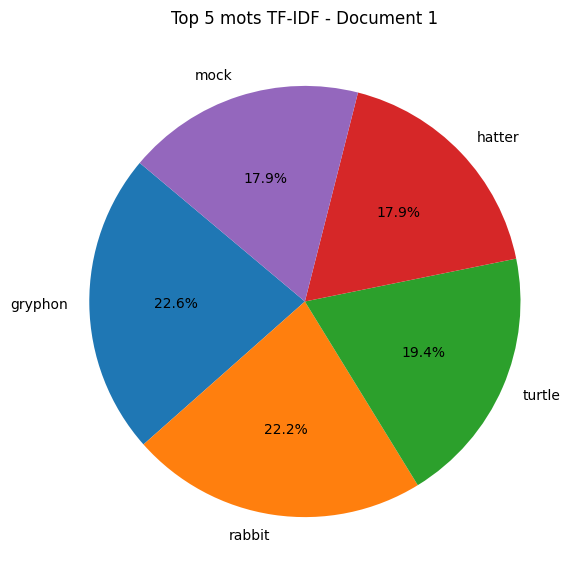

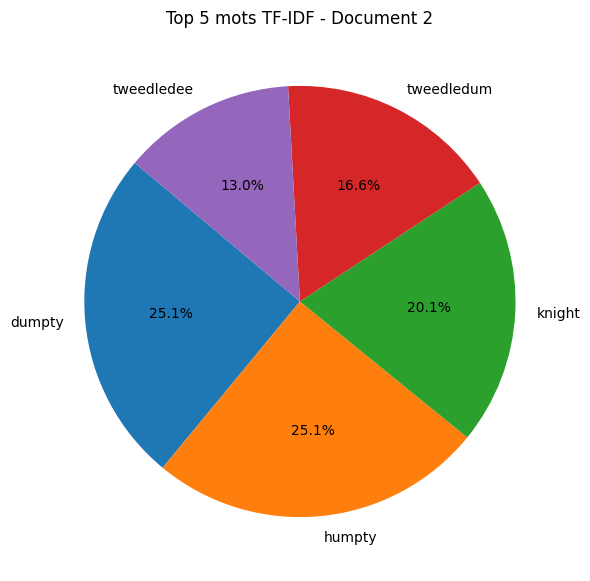

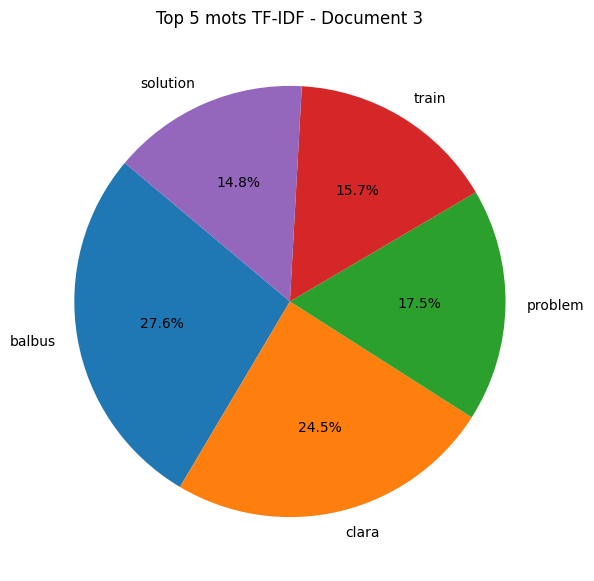

In [181]:
for i, doc_vec in enumerate(tfidf_matrix):
    # 4. Extraire les scores sous forme de dictionnaire {mot: score}
    scores = doc_vec.toarray().flatten()
    word_score_pairs = list(zip(feature_names, scores))

    # Garder les 5 mots avec le score le plus élevé
    top_words = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)[:5]

    words, scores_top = zip(*top_words)

    # 5. Afficher camembert
    plt.figure(figsize=(7,7))
    plt.title(f'Top 5 mots TF-IDF - Document {i+1}')
    plt.pie(scores_top, labels=words, autopct='%1.1f%%', startangle=140)
    plt.show()